# Lab assignment 2
Theophile Ayrinhac
ID: 260711024

Function to generate a random square matrix of size $n\times n$ of random number in $[-1; 1]$

## Preliminary functions

In [10]:
import numpy as np
import matplotlib.pyplot as plt

eps = .0000000001

def generate_uniform(n):
    A = []
    for i in range(n):
        A.append([])
        for j in range(n):
            A[i].append(np.random.uniform(-1., 1.))
    return np.matrix(A)

Now let us define a few basic matrix operations

In [41]:
def switch_rows(A, i, j): #switch rows i and j in place
    A[[i,j]] = A[[j,i]]

def add_muyltiplied_row(A, i, j, x): #add the row R times x to the row j of the matrix A in place
    A[j] = A[j] + A[i]*x
    #clear_matrix(A)

def row_elimination(A, i): #apply gaussian elimination for pivot i
    for k in range(i+1, len(A)):
        x = - (1/A[i,i]) * A[k,i]#compute number to eliminate
        add_muyltiplied_row(A, i, k, x)
    return A
    
def clear_matrix(A): #Remove number that are very small
    for i in range(len(A)):
        for j in range (len(A)):
            if(np.absolute(A[i,j]) < eps): A[i,j] = 0

In [12]:
def gaussian_elimination(A): #Gaussian elimination with partial pivoting
    R = np.copy(A)
    for i in range(len(R)):
        row_elimination(R, i)
    return R
        
def growth_factor(A, U):
    return np.absolute(U).max() / np.absolute(A).max()

## Uniform distribution

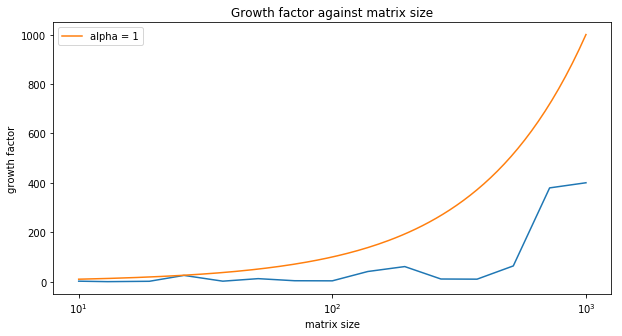

In [37]:
nlist = np.logspace(1, 3, 15, endpoint=True, dtype=int)
naverage = 100
glist = []

plt.figure(figsize=(10,5))

for i in range(len(nlist)):
    n = nlist[i]
    glist.append(0)
    for j in range(naverage):
        A = generate_uniform(n)
        U = gaussian_elimination(A)
        glist[i] = growth_factor(A, U)/naverage
  
 
        
plt.plot(nlist,glist)
   
nlist = np.logspace(1, 3, 150)
plt.plot(nlist,np.power(nlist, 1), label='alpha = 1')
plt.plot()

plt.xscale('symlog')
plt.title(r'Growth factor against matrix size')
plt.xlabel(r'matrix size')
plt.ylabel('growth factor')
plt.legend()
plt.show()

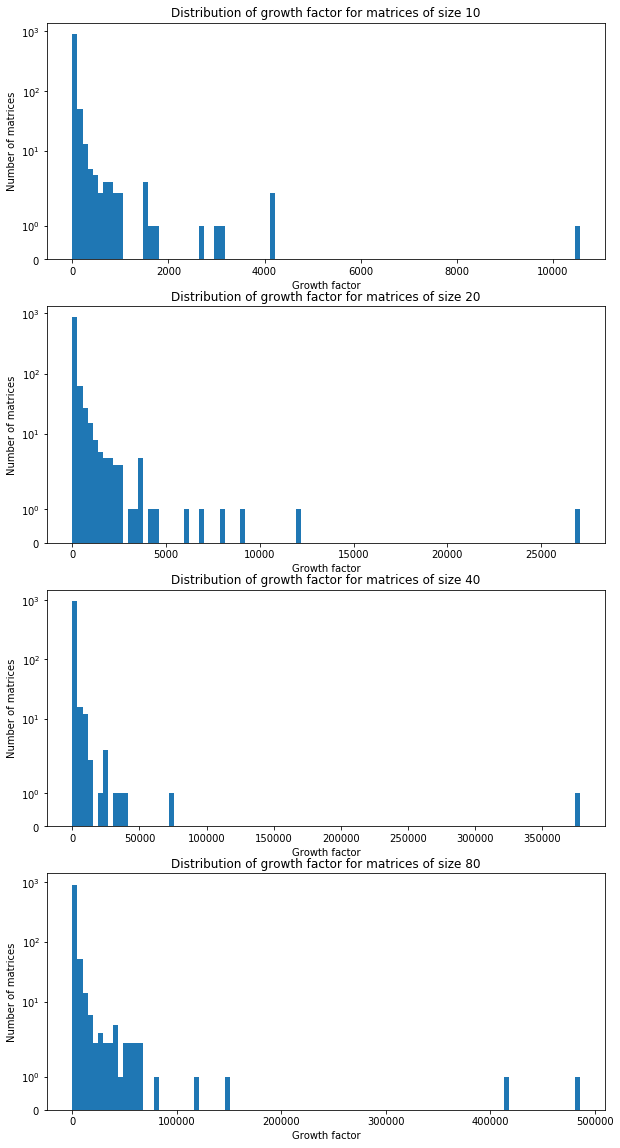

In [36]:
nlist=[10, 20, 40, 80]
amount=1000

fig = plt.figure(figsize=(10,20))
subplts = [fig.add_subplot(411), fig.add_subplot(412), fig.add_subplot(413), fig.add_subplot(414)]

for k in range(len(nlist)):
    n = nlist[k]
    growth_list = []
    for i in range(amount):
        A = generate_uniform(n)
        U = gaussian_elimination(A)
        g = growth_factor(A, U)
        growth_list.append(g)
    
    subplts[k].hist(growth_list, 100)
    subplts[k].set_yscale('symlog')
    subplts[k].set_title(r'Distribution of growth factor for matrices of size %d'%n)
    subplts[k].set_xlabel(r'Growth factor')
    subplts[k].set_ylabel('Number of matrices')
    subplts[k].legend()
        
plt.show()

## Normal distribution

In [14]:
mu, sigma = 0, 0.5

def generate_normal(n):
    A = []
    for i in range(n):
        A.append([])
        for j in range(n):
            A[i].append(np.random.normal(mu, sigma))
    return np.matrix(A)

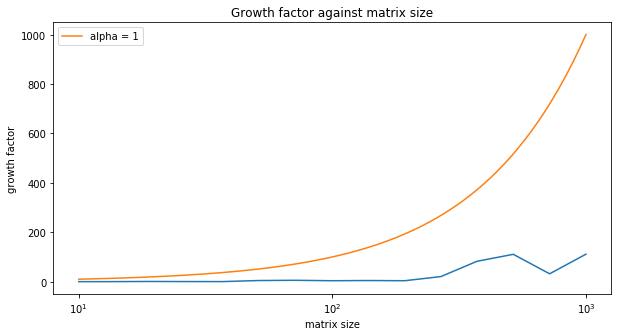

In [38]:
nlist = np.logspace(1, 3, 15, endpoint=True, dtype=int)
naverage = 100
glist = []

plt.figure(figsize=(10,5))

for i in range(len(nlist)):
    n = nlist[i]
    glist.append(0)
    for j in range(naverage):
        A = generate_normal(n)
        U = gaussian_elimination(A)
        glist[i] = growth_factor(A, U)/naverage
  
 
        
plt.plot(nlist,glist)
   
nlist = np.logspace(1, 3, 150)
plt.plot(nlist,np.power(nlist, 1), label='alpha = 1')
plt.plot()

plt.xscale('symlog')
plt.title(r'Growth factor against matrix size')
plt.xlabel(r'matrix size')
plt.ylabel('growth factor')
plt.legend()
plt.show()

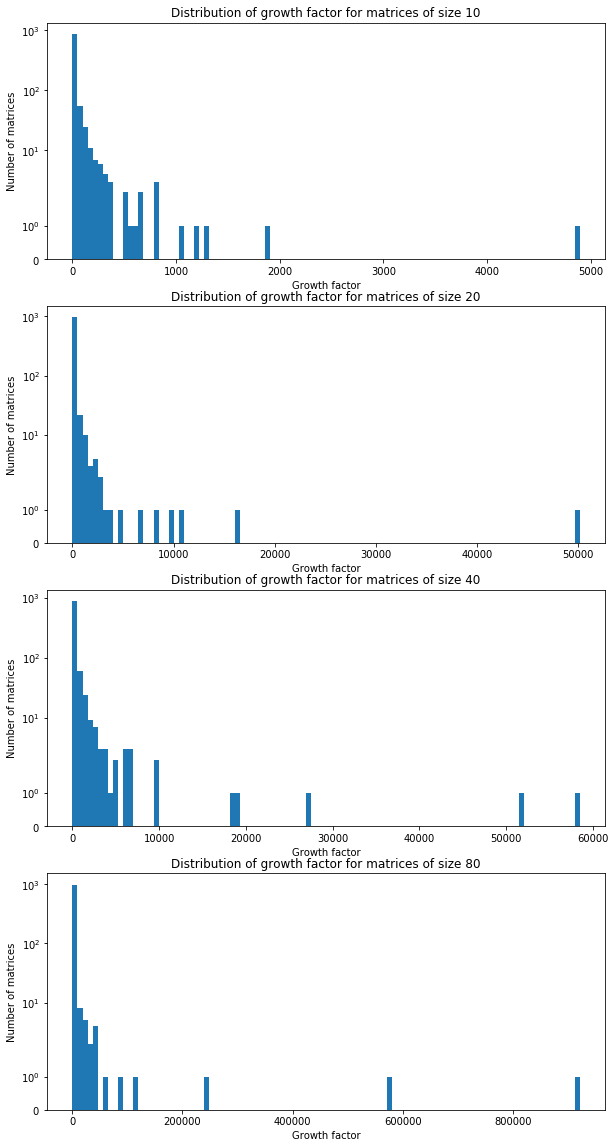

In [39]:
nlist=[10, 20, 40, 80]
amount=1000

fig = plt.figure(figsize=(10,20))
subplts = [fig.add_subplot(411), fig.add_subplot(412), fig.add_subplot(413), fig.add_subplot(414)]

for k in range(len(nlist)):
    n = nlist[k]
    growth_list = []
    for i in range(amount):
        A = generate_normal(n)
        U = gaussian_elimination(A)
        g = growth_factor(A, U)
        growth_list.append(g)
    
    subplts[k].hist(growth_list, 100)
    subplts[k].set_yscale('symlog')
    subplts[k].set_title(r'Distribution of growth factor for matrices of size %d'%n)
    subplts[k].set_xlabel(r'Growth factor')
    subplts[k].set_ylabel('Number of matrices')
    subplts[k].legend()
        
plt.show()